# Introduction

I have created this notebook for 2 tasks at the virtual internship **Data Science & Business Analytics** as part of the **GRIP** program from **The Sparks Foundation**.

<div style="text-align: center;">
    <h1>The Sparks Foundation</h1>
    <img src="the-sparks-foundation.png" alt="Sample Image" width="400" height="200">
</div>

# Task 1

## Predicting Using Supervised ML

#### We will make a simple linear regression analysis on a dataset containing hours of study and corresponding scores and predict some values.

<br><br>
<div style="text-align: center;">
    <img src="study.jpg" alt="Sample Image" width="600" height="100">
</div>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Define the data
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86]
}

# Create a DataFrame
df = pd.DataFrame(data)

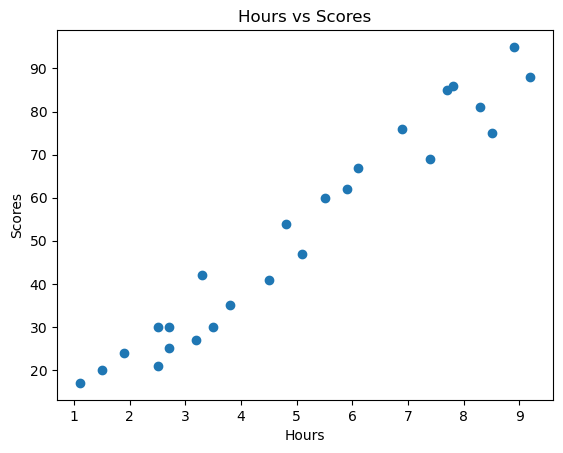

In [3]:
# Visualize the data
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Initializing and Training the Model

In [4]:
# Initialize the model
model = LinearRegression()

In [5]:
# Prepare the data for training
X = df[['Hours']]
y = df['Scores']

## Training on Full Data & Visualizing the Regression Line

In [6]:
# Train the model
model.fit(X, y)

LinearRegression()

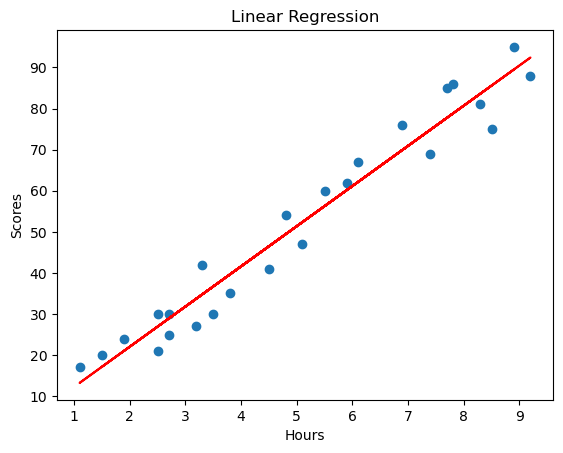

In [7]:
# Visualize the regression line
plt.scatter(df['Hours'], df['Scores'])
plt.plot(df['Hours'], model.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [8]:
# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 2.483673405373196
Coefficient: 9.775803390787472


## Spliting Data for Evaluation

In [9]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Evaluating the Model & Comparing Actual and Predicted Values

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 4.352380006653288


In [11]:
# Create a DataFrame for Actual and Predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the results
results

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Predicting New Values

In [12]:
# Predict new values
new_hours = [4.0, 6.0, 7.5, 11, 15]
new_X = pd.DataFrame({'Hours': new_hours})
predicted_scores = model.predict(new_X)

# Create a DataFrame for the new predictions
new_predictions = pd.DataFrame({'Hours': new_hours, 'Predicted_Scores': predicted_scores})

# Display the new predictions
new_predictions

,Hours,Predicted_Scores
0,4.0,41.555205
1,6.0,60.919361
2,7.5,75.442479
3,11.0,109.329752
4,15.0,148.058065


## Conclusion

Through hands-on practice, we gained valuable insights into how studying hours correlate with scores. We visualized the data, trained a linear regression model, and evaluated its performance. The model demonstrated its predictive power on both the test set and for new values.

This experience has not only enhanced our technical skills but also deepened our understanding of real-world applications of data science. It serves as a testament to the quality of education.

# Task 2

## Predicting Using Unsupervised ML

#### We will perform a clustering analysis on the famous Iris dataset. Clustering is an unsupervised machine learning technique used to group similar data points together. The Iris dataset contains measurements of four features of iris flowers (sepal length, sepal width, petal length, and petal width) and the corresponding species. Our goal is to identify natural groupings or clusters within the data.

<br><br>
<div style="text-align: center;">
    <img src="iris.jpg" alt="Sample Image" width="600" height="100">
</div>

In [13]:
# Load data
data2 = pd.read_csv("iris.csv")

## Data Exploration

In [14]:
data2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


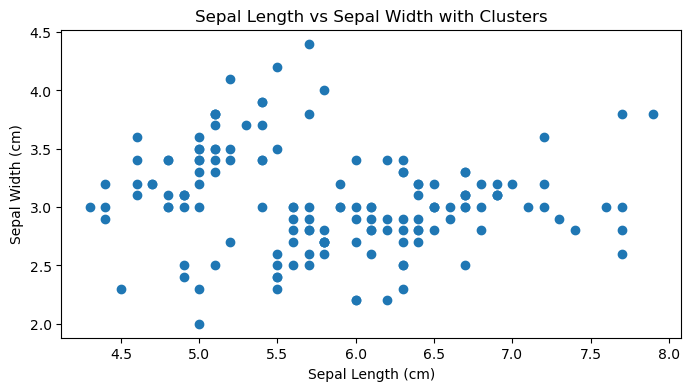

In [15]:
# Scatter plot for Sepal Length vs Sepal Width with cluster labels
plt.figure(figsize=(8, 4))
plt.scatter(data2['SepalLengthCm'], data2['SepalWidthCm'])
plt.title('Sepal Length vs Sepal Width with Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

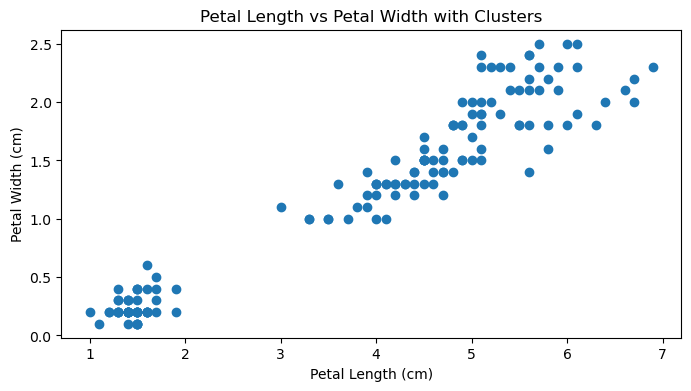

In [16]:
# Scatter plot for Petal Length vs Petal Width with cluster labels
plt.figure(figsize=(8, 4))
plt.scatter(data2['PetalLengthCm'], data2['PetalWidthCm'])
plt.title('Petal Length vs Petal Width with Clusters')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

## Data Preprocessing

In [17]:
# Remove "Species" and "Id" columns for clustering
X = data2.drop(["Species", "Id"], axis=1)

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [19]:
# Use the Elbow Method to find optimal n_clusters
inertia_values = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

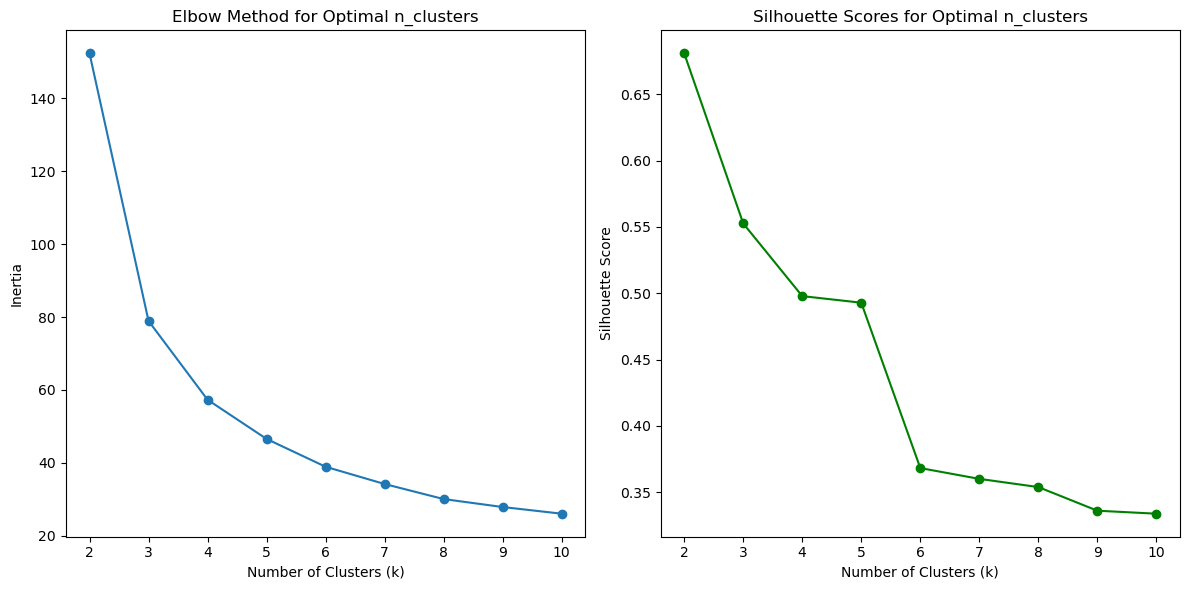

In [20]:
# Plotting Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Optimal n_clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))

plt.tight_layout()
plt.show()

## The Best Number of CLusters

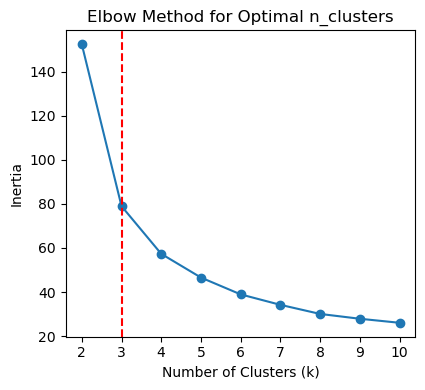

In [21]:
# Plotting Elbow Method
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))

# Add a vertical line to indicate the optimal number of clusters
optimal_k = 3
plt.axvline(x=optimal_k, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [22]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
data2["Cluster"] = clusters

In [23]:
# Create a list of unique cluster labels
unique_clusters = data2['Cluster'].unique()
unique_clusters

array([1, 0, 2])

## Displaying the Groups of Clusters

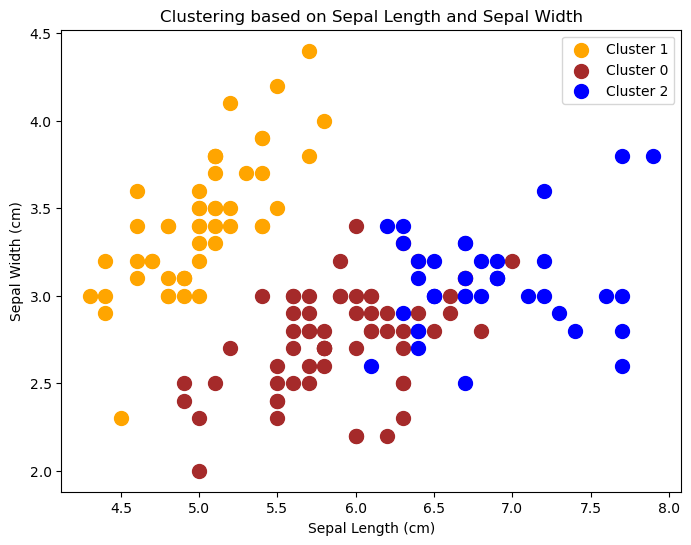

In [24]:
# Define a list of colors corresponding to each cluster
colors = ['orange', 'brown', 'blue']

# Visualize Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))

# Loop through each unique cluster and plot points with corresponding label
for i, cluster_id in enumerate(unique_clusters):
    cluster_data = data2[data2['Cluster'] == cluster_id]
    plt.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], s=100, c=colors[i], label=f'Cluster {cluster_id}')

plt.title('Clustering based on Sepal Length and Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

## Predicting new values

In [25]:
# Prepare New Data
new_data = pd.DataFrame({
    'SepalLengthCm': [5.0, 6.0, 4.8, 8.5, 3.2],
    'SepalWidthCm': [3.2, 2.8, 3.0, 5.6, 1.4],
    'PetalLengthCm': [1.2, 4.2, 1.5, 3.5, 3.0],
    'PetalWidthCm': [0.2, 1.2, 0.3, 0.9, 0.2]
})

# Predict Clusters
new_clusters = kmeans.predict(new_data)

# Assuming you have a mapping of cluster numbers to class labels
cluster_labels = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C'
}

# Convert the predicted clusteres to their clusters
predicted_classes = [cluster_labels[cluster] for cluster in new_clusters]

# Create a DataFrame with new_data and its predicted clusters
predicted_df = pd.DataFrame(new_data)

# Add the predicted clusters to the DataFrame
predicted_df['Predicted Cluster'] = new_clusters

# Add a column for the predicted classes based on cluster labels
predicted_df['Predicted Class'] = predicted_classes

# Display the DataFrame
predicted_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Cluster,Predicted Class
0,5.0,3.2,1.2,0.2,1,Cluster B
1,6.0,2.8,4.2,1.2,0,Cluster A
2,4.8,3.0,1.5,0.3,1,Cluster B
3,8.5,5.6,3.5,0.9,2,Cluster C
4,3.2,1.4,3.0,0.2,1,Cluster B


## Conclusion

In this analysis, we explored the Iris dataset using clustering techniques. We visualized the data, determined the optimal number of clusters, and performed k-means clustering. The resulting clusters provide insights into potential groupings within the data. This analysis can be extended to other datasets to discover hidden patterns and relationships.

I wish my work admire you!

Made by **Abdelrahman Eldaba**